In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\prajw\Data Science\Assignments\7 Clustering\crime_data.csv")

In [3]:
df=data.copy()

In [4]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
def norm_function (i):
    x=(i-i.min())/(i.max()-i.min())
    return x

In [6]:
df_norm=norm_function(df.iloc[:,1:])

In [7]:
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


## Kmeans

In [8]:
from sklearn.cluster import KMeans

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


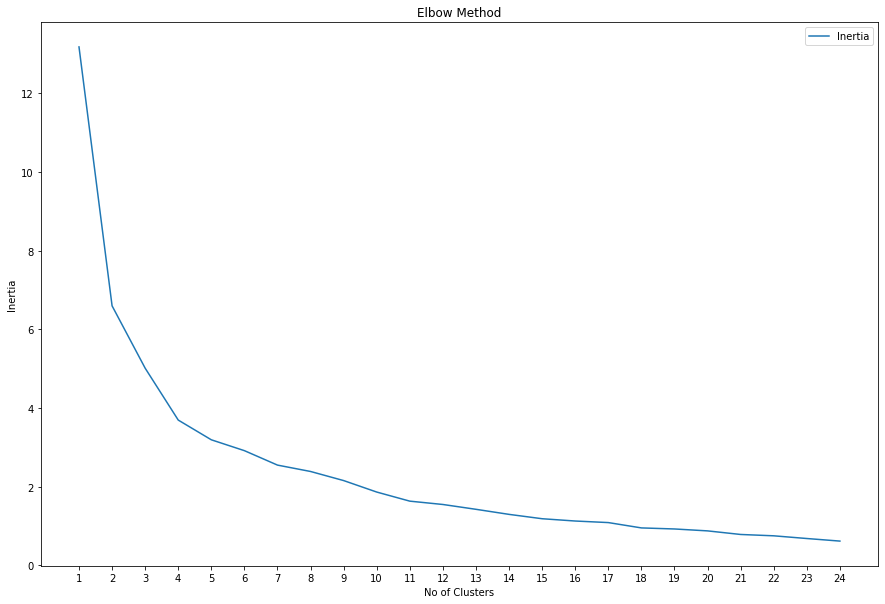

In [9]:
plt.figure(figsize=(15,10))
wcss=[]
for i in range(1,25):
    kmeans=KMeans(n_clusters=i,random_state=6)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,25),wcss,label="Inertia")
plt.title("Elbow Method")
plt.xlabel("No of Clusters")
plt.ylabel("Inertia")
plt.legend()
plt.xticks(range(1,25))
plt.show()

In [10]:
kmeans=KMeans(n_clusters=4,random_state=6)

In [11]:
pred=kmeans.fit_predict(df_norm)

In [12]:
pred

array([3, 1, 1, 3, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 2, 3, 2, 1, 0, 1,
       2, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0])

In [13]:
df["Kmeans cluster_id"]=pred

In [14]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Kmeans cluster_id
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,1


## Heirarchial Clustering

In [15]:
import scipy.cluster.hierarchy as sch

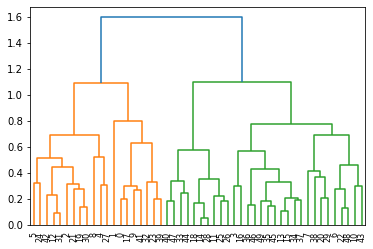

In [16]:
dendrogram=sch.dendrogram(sch.linkage(df_norm,method="complete"))

In [17]:
from sklearn.cluster import AgglomerativeClustering

In [18]:
hc=AgglomerativeClustering(n_clusters=4,affinity="euclidean",linkage="complete")

In [19]:
hc.fit(df_norm)

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [20]:
y_hc=hc.fit_predict(df_norm)

In [21]:
y_hc

array([0, 0, 3, 1, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 1, 0, 2, 3, 1, 3,
       1, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 1, 1], dtype=int64)

In [22]:
df["h_Clusterid"]=y_hc

In [23]:
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Kmeans cluster_id,h_Clusterid
0,Alabama,13.2,236,58,21.2,3,0
1,Alaska,10.0,263,48,44.5,1,0
2,Arizona,8.1,294,80,31.0,1,3
3,Arkansas,8.8,190,50,19.5,3,1
4,California,9.0,276,91,40.6,1,3
5,Colorado,7.9,204,78,38.7,1,3
6,Connecticut,3.3,110,77,11.1,0,1
7,Delaware,5.9,238,72,15.8,0,1
8,Florida,15.4,335,80,31.9,1,3
9,Georgia,17.4,211,60,25.8,3,0
